### Machine Learning Classification: Poisonous Mushrooms

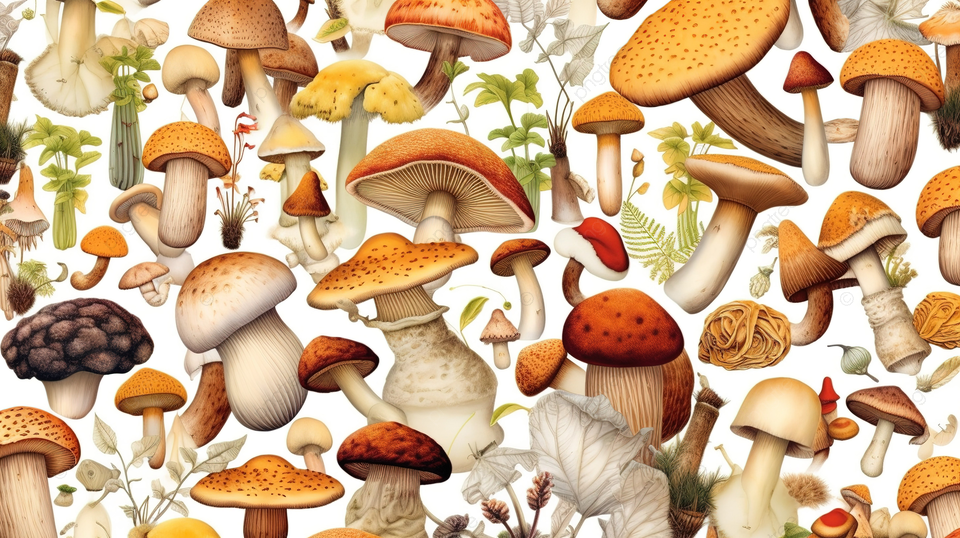

#### 1. Importing libraries and tools

In [52]:

# Importing libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data preprocessing and machine learning
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# Import libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Ignoring warnings for future code changes
import warnings
warnings.filterwarnings("ignore")


#### 2. Loading the data

In [130]:
# Loading data into a data frame
df = pd.read_csv('mushrooms.csv')

# Creating copy of data set for ease of use
df_binary = df.copy(deep=True)
df2 = df.copy(deep=True)
df3 = pd.read_csv('mushrooms.csv')

#### 3. Exploratory Data Analysis

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [55]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [56]:
# Printing columns names
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [57]:
# Identifying the target and the features
target = ['class']
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [58]:
# Counting unique values per features to check dimension
for i in columns:
    unique_values = df[i].nunique()
    print(f'{i}: {unique_values}')
    

cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


There are 23 columns in our data set, all categorical values. 5 of those are binary, 17 has from 3 to 10 categories. Our target is class (poisonous/edible) which has 2 unique values.
There are 8124 entries and no null values. 
Veil type has only 1 unique value so Im gonna drop that column. 

In [59]:
#df = df.drop(['veil-type'], axis=1)
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-color', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
binary_columns = ['bruises', 'gill-attachment','gill-spacing', 'gill-size', 'stalk-shape']

Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

#### 4. Visualisation

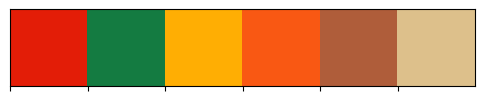

In [60]:
# Creating a palette
palette3= sns.color_palette(['#E31D07', '#147B41','#FFAE03','#F95813','#AF5D3A','#DDC08B'])
sns.palplot(palette3)
sns.set_palette(palette3)

In [131]:
# Checking Columns and categories and print them in a data frame
colname = []
colcodes = []
cols = df3.columns
for i in cols:
    colname.append(i)
    colcodes.append(set(df2[i].tolist()))
coldir = pd.DataFrame(colname,colcodes)
coldir

,0
"{e, p}",class
"{s, c, b, k, x, f}",cap-shape
"{g, y, s, f}",cap-surface
"{c, n, u, b, y, w, r, e, g, p}",cap-color
"{t, f}",bruises
"{s, a, c, n, l, y, m, f, p}",odor
"{a, f}",gill-attachment
"{c, w}",gill-spacing
"{b, n}",gill-size
"{h, n, u, b, y, w, k, o, r, e, g, p}",gill-color


In [132]:
# Looping through the columns, all the data type are changed to 'category' and then we can apply .cat.codes
# With cat.codes each unique category in the categorical column is assigned a numerical code starting from 0. This encoding allows you to represent 
# categorical data numerically, which is often required for machine learning algorithms that only accept numerical input.
df2.drop(['veil-type'], axis=1, inplace=True)
cols = df2.columns
for i in cols:
    df2[i] = df2[i].astype('category')
    df2[i] = df2[i].cat.codes
    

In [134]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


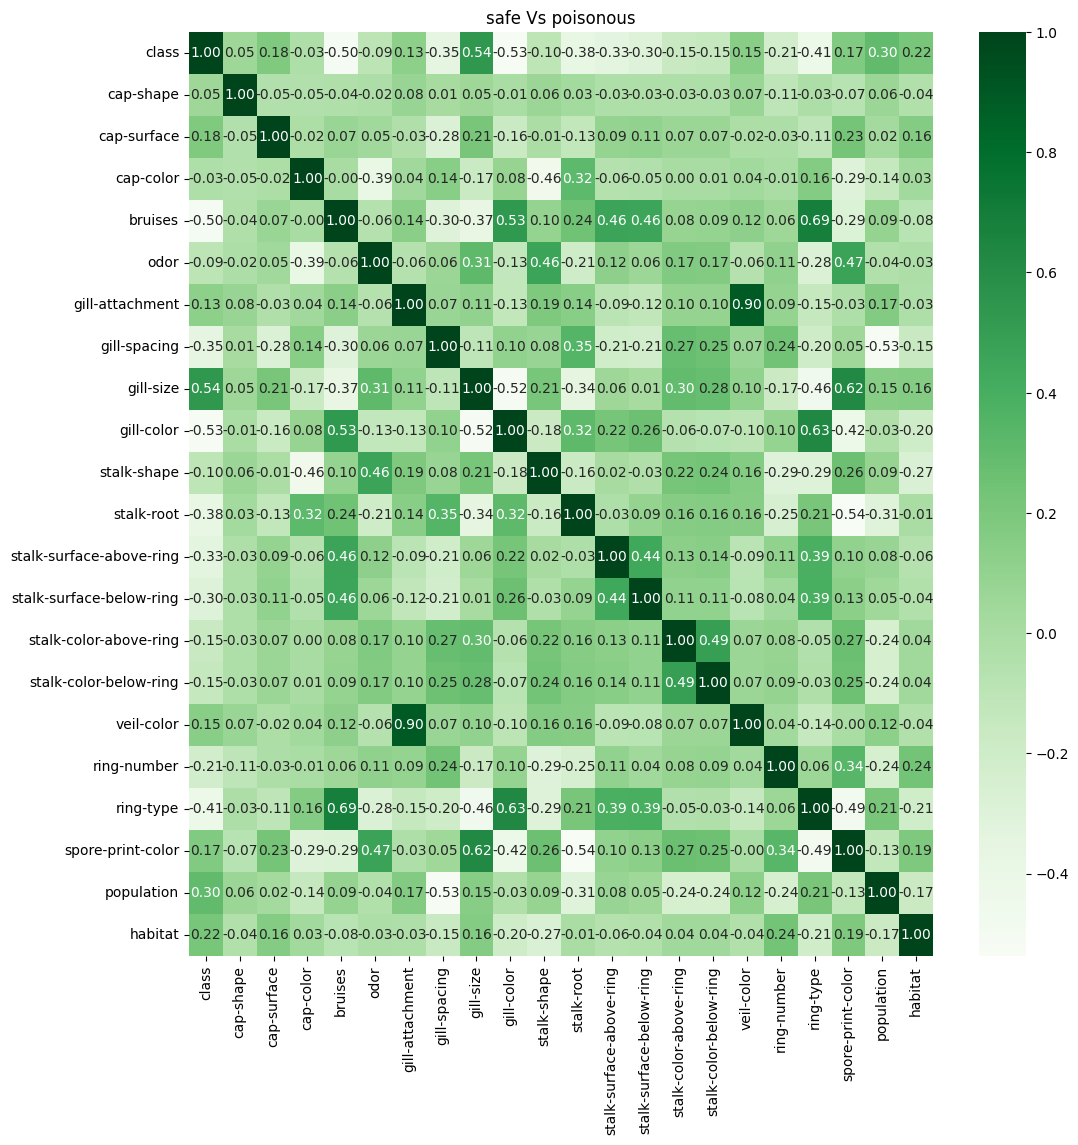

In [135]:
# Using the previous encoding we can plot a heatmap that can be easily visually explored(using the 23 columns 
# rather than the 97 generated by one-hot encoding )
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title("safe Vs poisonous")
plt.show()

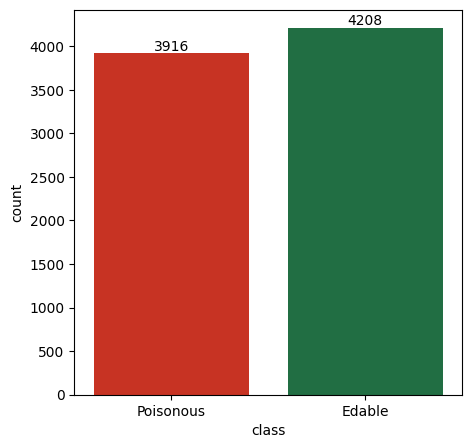

In [61]:
# Visualising the target
plt.figure(figsize=(5,5))   
ax = sns.countplot(data=df, x=df['class'], palette=palette3)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(['Poisonous','Edable'])
plt.show()

Now for all the features a plot a count plot with class as hue

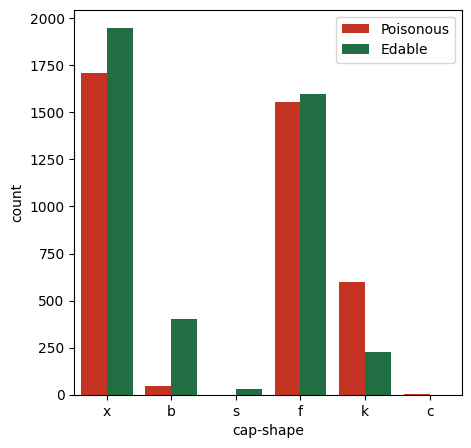

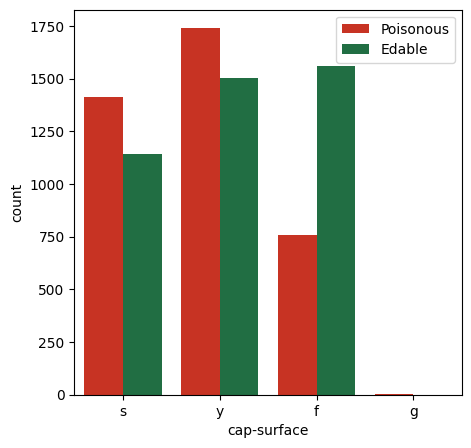

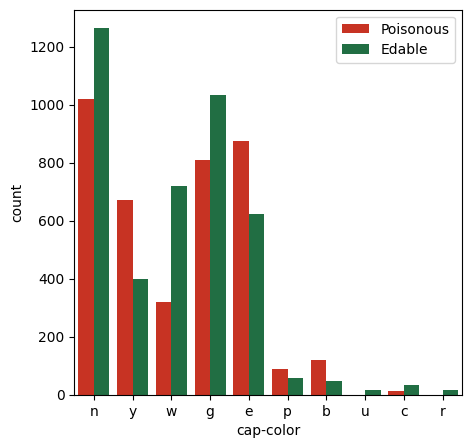

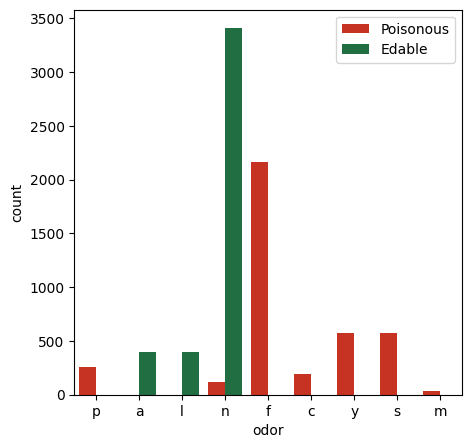

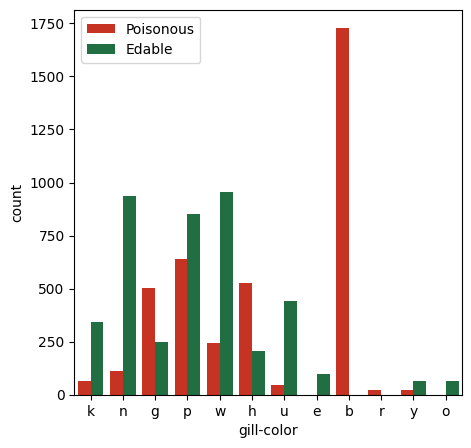

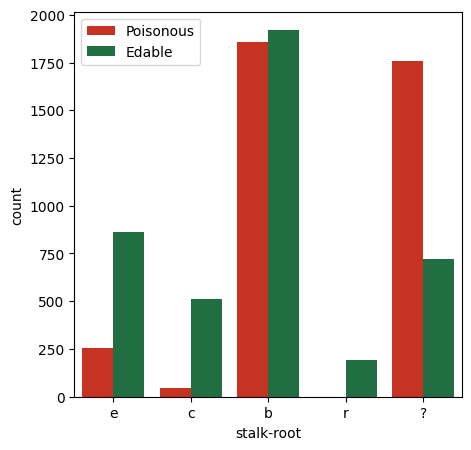

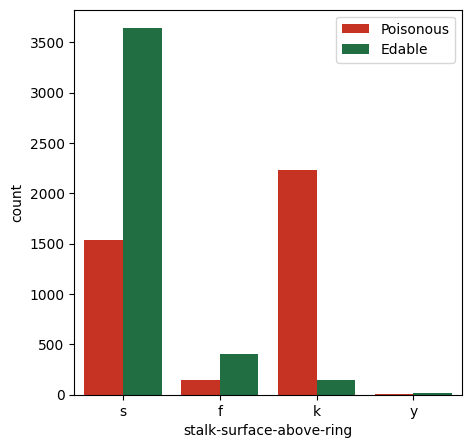

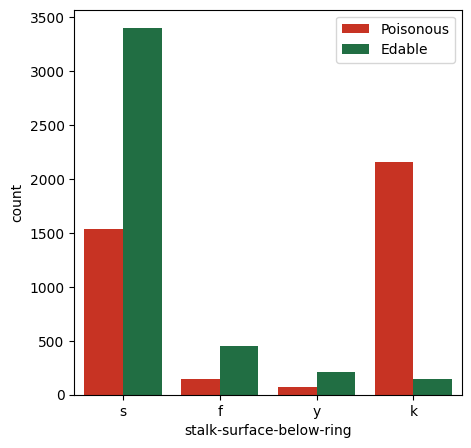

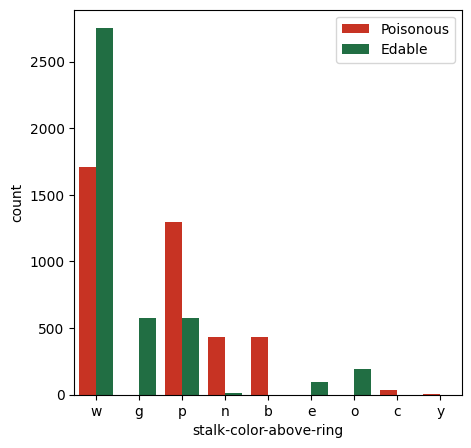

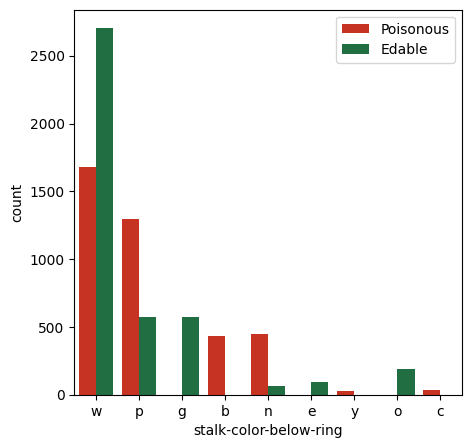

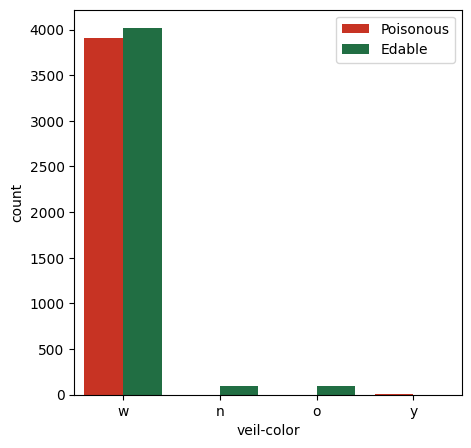

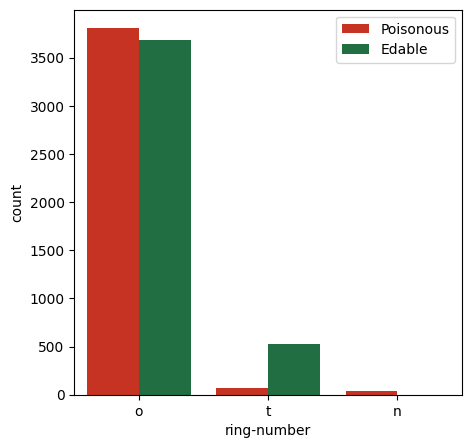

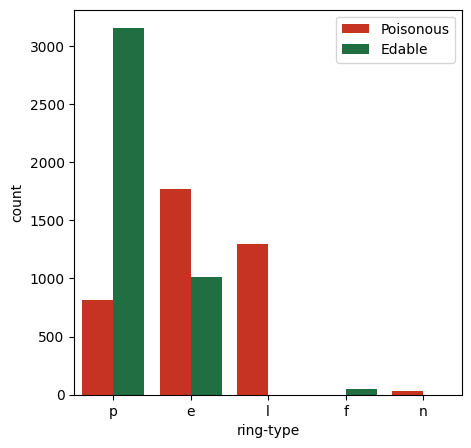

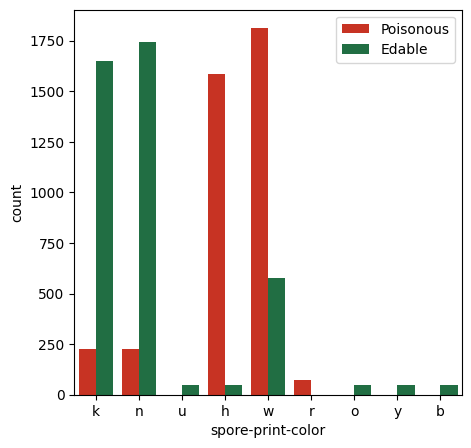

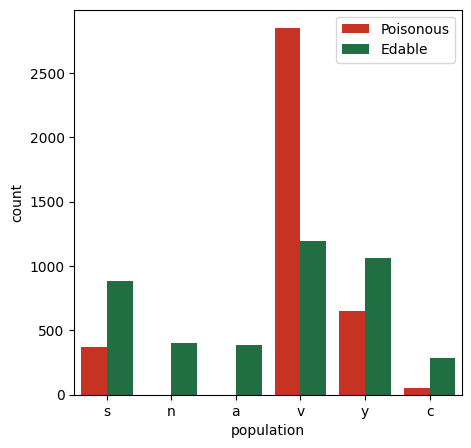

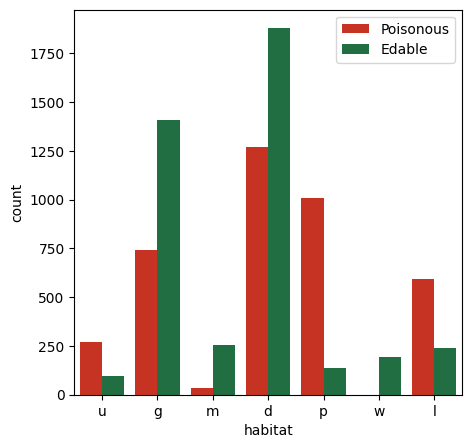

In [62]:

for i in categorical_columns:
    plt.figure(figsize=(5,5))
    ax = sns.countplot(data=df, x=df[i], hue='class', palette=palette3)
    plt.legend(['Poisonous','Edable'])
    #ax.set_xticklabels(['Poisonous','Edable'])
    plt.show()

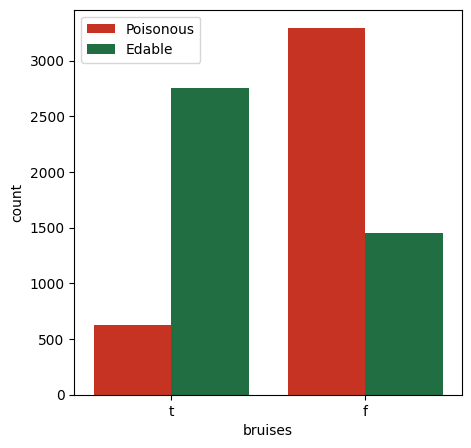

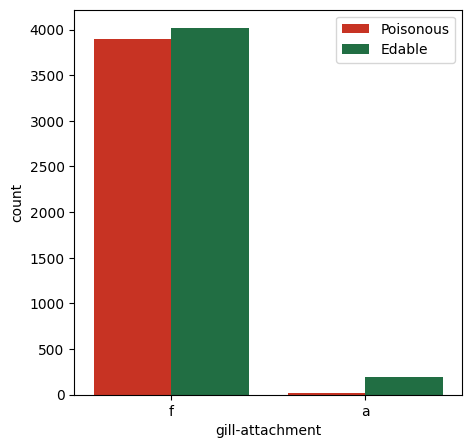

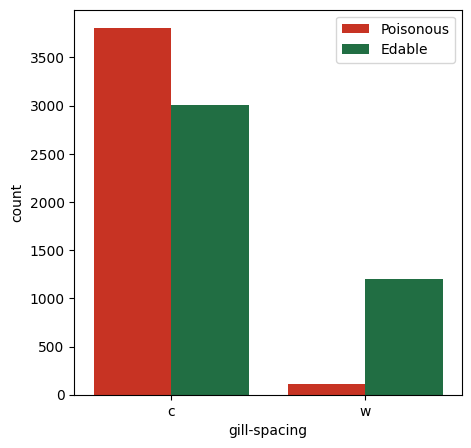

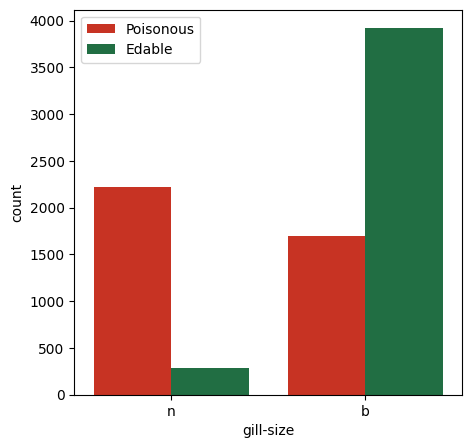

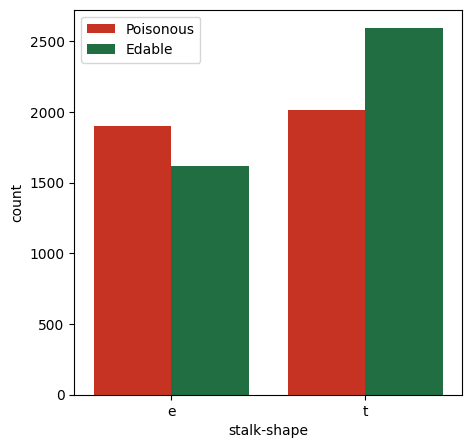

In [63]:
for i in binary_columns:
    plt.figure(figsize=(5,5))
    ax = sns.countplot(data=df, x=df[i], hue='class', palette=palette3)
    plt.legend(['Poisonous','Edable'])
    #ax.set_xticklabels(['Poisonous','Edable'])
    plt.show()

<Axes: xlabel='unique', ylabel='index'>

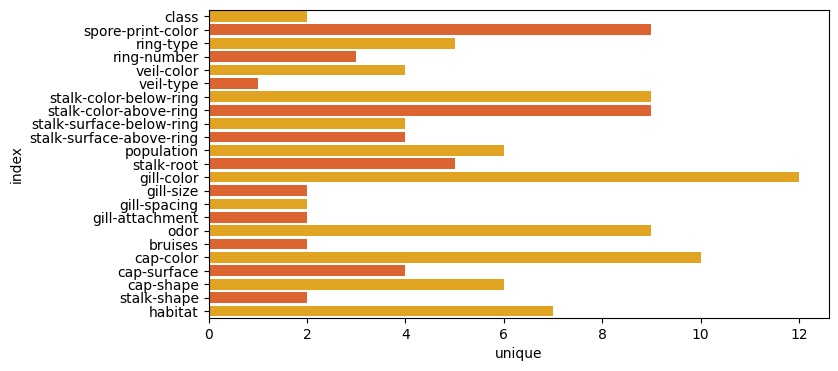

In [64]:
data = df.describe(include='all').T.reset_index().sort_values('count')

# Visualizizng count of categories in every feature:
plt.figure(figsize=(8,4),dpi=100)
plt.ylabel('')
sns.barplot(data,x='unique',y='index', palette=['#FFAE03','#F95813'])

In [65]:
print(columns)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


#### 5. Data Preprocessing

In [66]:
#One hot encoding, dropping one category for the binary features
for i in binary_columns:
    df=pd.get_dummies(df, columns=[i], drop_first=True, dtype = 'int')

In [67]:
df.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,ring-number,ring-type,spore-print-color,population,habitat,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t
0,p,x,s,n,p,k,e,s,s,w,...,o,p,k,s,u,1,1,0,1,0
1,e,x,s,y,a,k,c,s,s,w,...,o,p,n,n,g,1,1,0,0,0
2,e,b,s,w,l,n,c,s,s,w,...,o,p,n,n,m,1,1,0,0,0
3,p,x,y,w,p,n,e,s,s,w,...,o,p,k,s,u,1,1,0,1,0
4,e,x,s,g,n,k,e,s,s,w,...,o,e,n,a,g,0,1,1,0,1


In [68]:
#One hot encoding for categorical values
for i in categorical_columns:
    df=pd.get_dummies(df, columns=[i], drop_first= True, dtype = 'int')

In [69]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [70]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [71]:
df.drop(['veil-type'], axis=1, inplace=True)

In [95]:
df=pd.get_dummies(df, columns=['class'], drop_first= True, dtype = 'int')

#### 6. Preparing Training and Test data

In [72]:
# Defyning the X and y and checking shape and type
X = df.iloc[:, 1:21].values
y = df.iloc[:, 0].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(8124, 20)
(8124,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [73]:
# Label encoding the target
y = LabelEncoder().fit_transform(y)

In [74]:
# Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 1/4, random_state=32)


#### 7. Logistic Regression

In [75]:
# Fitting the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#### 8. Random Forest

In [76]:
random_f = RandomForestRegressor()
random_f.fit(X_train, y_train)

RandomForestRegressor()

#### 9. Decision Tree

In [77]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### 10. SVM

In [78]:
# SUPPORT VECTOR MACHINE
# Initialize a Support Vector Machine object
clf_Linear = svm.SVC(kernel='linear')
clf_Sigmoid = svm.SVC(kernel='sigmoid')
clf_RBF = svm.SVC(kernel='rbf')
clf_svm = svm.SVC()


In [79]:
clf_Linear.fit(X_train, y_train)

SVC(kernel='linear')

In [80]:
clf_Sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [81]:
clf_RBF.fit(X_train, y_train)

SVC()

In [82]:
clf_svm.fit(X_train, y_train)

SVC()

#### 11. Making predictions on the test set

In [83]:
# Making prediction on the test set.

y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_f = random_f.predict(X_test)
y_pred_tree  = tree.predict(X_test)
y_pred_clf_Linear = clf_Linear.predict(X_test)
y_pred_clf_Sigmoid = clf_Sigmoid.predict(X_test)
y_pred_clf_RBF = clf_RBF.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)

In [84]:
print(type(y_pred_log_reg))
print(type(y_pred_random_f))
print(type(y_pred_tree))
print(type(y_pred_clf_Linear))
print(type(y_pred_clf_Sigmoid))
print(type(y_pred_clf_RBF))
print(type(y_pred_svm))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### 12. Evaluating and comparing the models

AUC: 0.950796


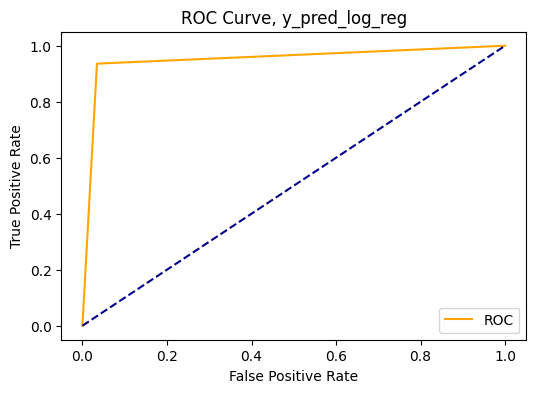

AUC: 0.998232


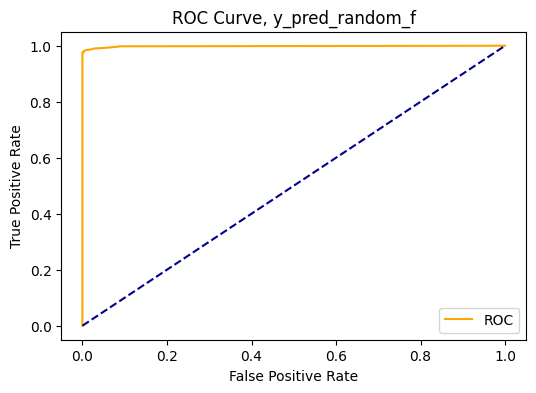

AUC: 0.989360


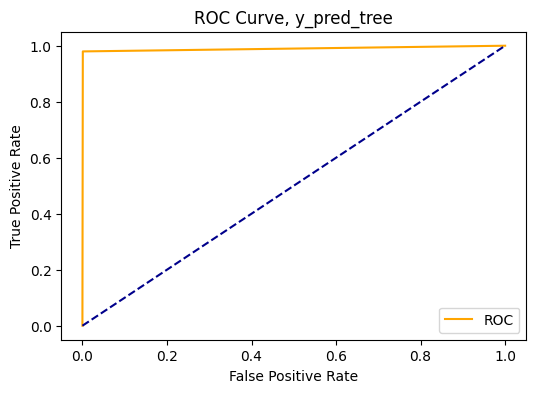

AUC: 0.968874


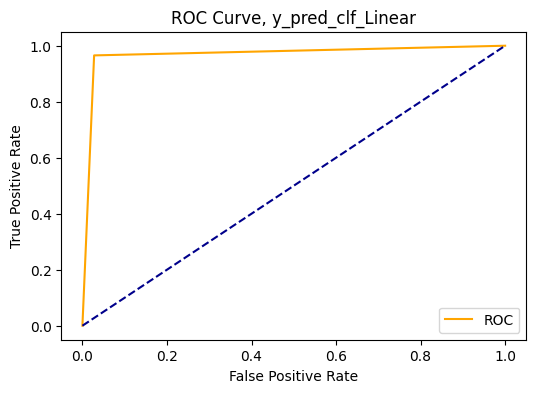

AUC: 0.711660


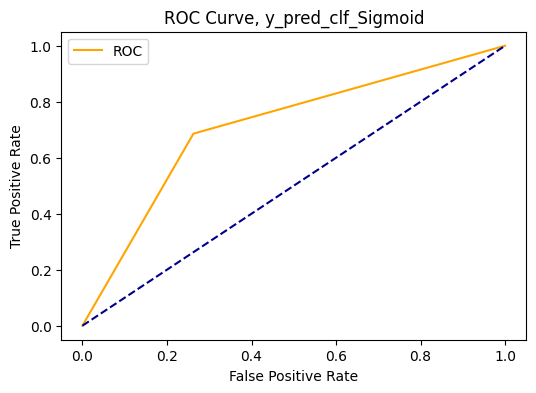

AUC: 0.986048


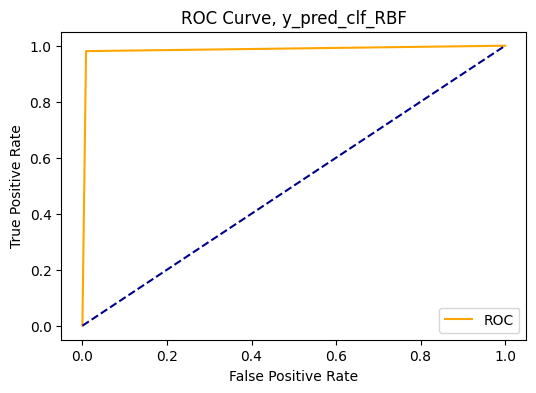

AUC: 0.986048


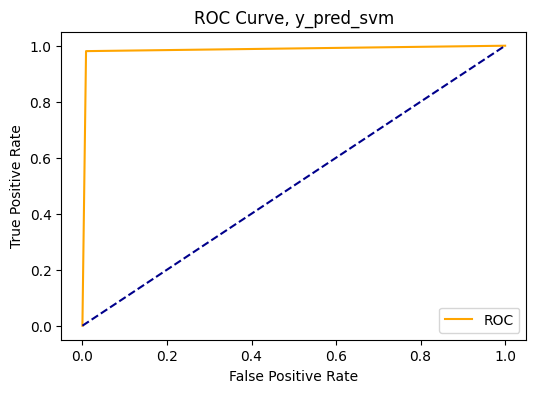

In [85]:
# Plotting ROC for the models using a for loop

y_pred = [y_pred_log_reg, y_pred_random_f, y_pred_tree, y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]
models =[log_reg, random_f, tree, clf_Linear, clf_Sigmoid, clf_RBF, clf_svm]


# ROC CURVE (RECEIVER OPERATING CHARACTERISTIC)
for i, y_pred in enumerate([y_pred_log_reg, y_pred_random_f, y_pred_tree, y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]):
    plt.figure(figsize=(6, 4))
    auc_mod3 = roc_auc_score(y_test, y_pred)
    print('AUC: %f' %auc_mod3)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
     # Get the variable name dynamically
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve, {var_name}')
    plt.legend()
    plt.show()

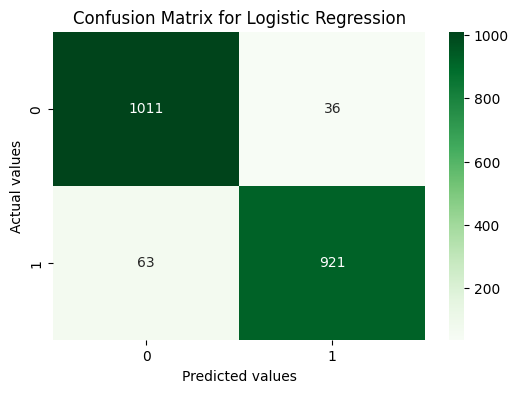

In [86]:
# Plotting confusion matrix for Logistic regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

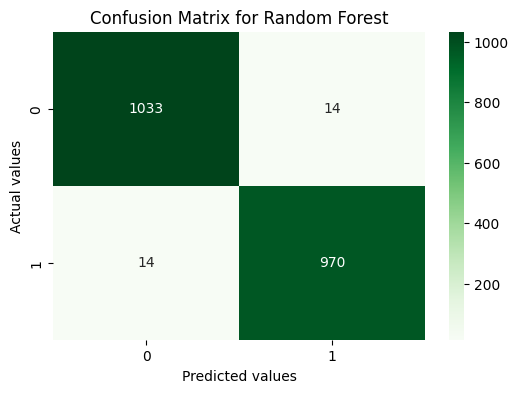

In [87]:
# Plotting confusion matrix for Random_Forest

#Define a threshold
threshold = 0.3

# Convert probabilities to class labels
y_pred_binary = np.where(y_pred_random_f >= threshold, 1, 0)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_binary ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for Random Forest')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

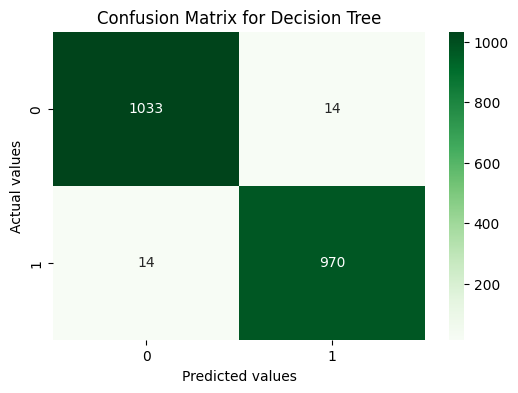

In [88]:
#Plotting confusion matrix for Decision Tree

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_binary ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for Decision Tree')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

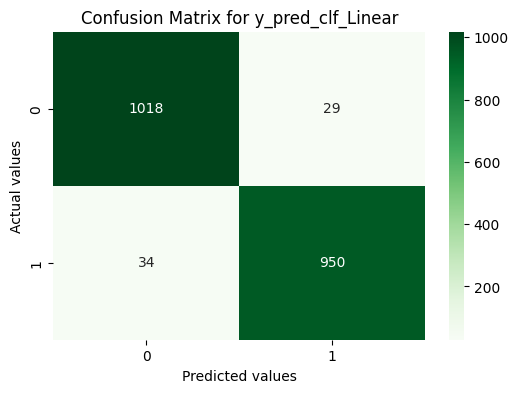

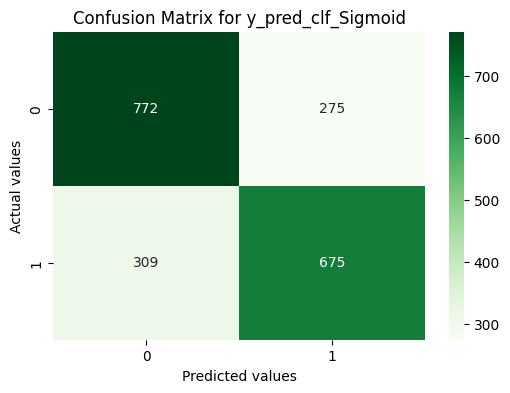

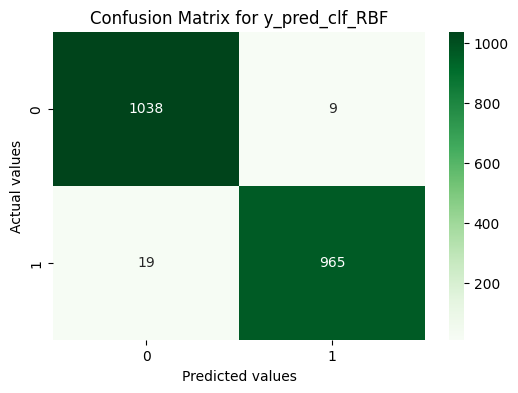

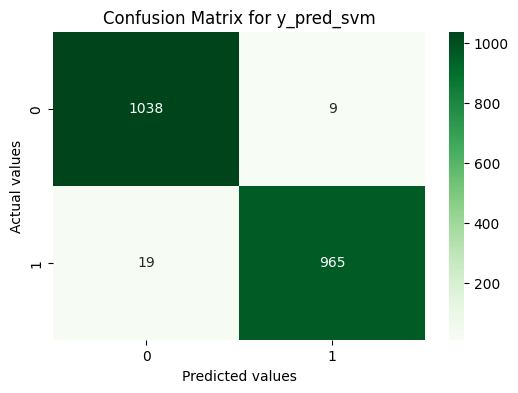

In [89]:
# EVALUATING THE SVM MODELS BY CONFUSION MATRIX, using a for loop for the visualisation

# CONFUSION MATRIX
# The confusion matrix is an N x N table (where N is the number of classes) that contains the number of correct and incorrect predictions of the classification model.
y_pred = [y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]
models_name=[clf_Linear, clf_Sigmoid, clf_RBF, clf_svm]

for i, y_pred in enumerate([y_pred_clf_Linear, y_pred_clf_Sigmoid, y_pred_clf_RBF, y_pred_svm]):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens")
    # Get the variable name dynamically
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.title(f'Confusion Matrix for {var_name}')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()
    # print sums of correct predictions, false positives and false negatives

In [90]:
# Creating a function to compare different model by accuracy and recall

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred> 0.5, 1, 0)
    Accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    Recall = round(recall_score(y_test, y_pred), 2)
    Precision = round(precision_score(y_test, y_pred), 2)
    F1_score = round(f1_score(y_test, y_pred), 2)
    return pd.DataFrame([Accuracy, Recall, Precision, F1_score], index=['Accuracy', 'Recall', 'Precision','F1_score'], columns=[model_name])

#accuracy = round((accuracy_score(y_test, y_pred_ann)),2)
#print("Accuracy:", accuracy)

In [91]:
# Applying the evaluation function to all the model with a for loop
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM(linear)', 'SVM(sigmoid)', 'SVM(RBF)', 'SVM(SVC)']

evaluation_results = []

for model_obj, model_name in zip(models, model_names):
    result = model_evaluation(model_obj, X_test, y_test, model_name)
    evaluation_results.append(result)

# Concatenate the evaluation results into a single DataFrame
Evaluation_df = pd.concat(evaluation_results, axis=1)
print(Evaluation_df)

           Logistic Regression  Random Forest  Decision Tree  SVM(linear)  \
Accuracy                  0.95           0.99           0.99         0.97   
Recall                    0.94           0.98           0.98         0.97   
Precision                 0.96           1.00           1.00         0.97   
F1_score                  0.95           0.99           0.99         0.97   

           SVM(sigmoid)  SVM(RBF)  SVM(SVC)  
Accuracy           0.71      0.99      0.99  
Recall             0.69      0.98      0.98  
Precision          0.71      0.99      0.99  
F1_score           0.70      0.99      0.99  


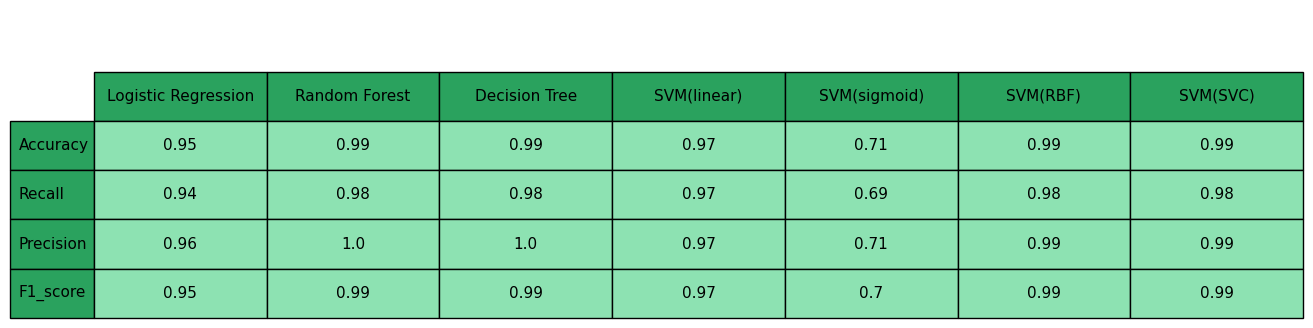

In [92]:
# TRYING TO CREATE A NICE TABLE TO PUT ON THE SLIDE WITHOUT HAVING TO REWRITE ALL THE VALUES IN A CANVA CREATED TABLE
# To do: figure out a way to name the rows efficiently, I still had to crop the table on Canva. 

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=Evaluation_df.values, colLabels=Evaluation_df.columns, loc='center')

table = ax.table(cellText=Evaluation_df.values,
                 colLabels=Evaluation_df.columns,
                 rowLabels=Evaluation_df.index,
                 loc='center',
                 cellLoc='center',
                 cellColours=[['#8DE2B2']*len(Evaluation_df.columns)]*len(Evaluation_df),
                 bbox=[0, 0, 1.3, 0.8])


# Adjust the font size and padding
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2)  # Increase cell padding
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == -1:
        cell.set_facecolor('#2AA25E')  # Set color for label cells
        

# Save the table as an image
plt.savefig('table_image.png')

# Show the table
plt.show()

In [93]:
styled_results_df = Evaluation_df.style.background_gradient(cmap='Greens', axis=1)
styled_results_df

,Logistic Regression,Random Forest,Decision Tree,SVM(linear),SVM(sigmoid),SVM(RBF),SVM(SVC)
Accuracy,0.950000,0.990000,0.990000,0.970000,0.710000,0.990000,0.990000
Recall,0.940000,0.980000,0.980000,0.970000,0.690000,0.980000,0.980000
Precision,0.960000,1.000000,1.000000,0.970000,0.710000,0.990000,0.990000
F1_score,0.950000,0.990000,0.990000,0.970000,0.700000,0.990000,0.990000


In [94]:
styled_results_df = Evaluation_df.style.highlight_max(axis=1, color='#F95813')
styled_results_df
styled_results_df

,Logistic Regression,Random Forest,Decision Tree,SVM(linear),SVM(sigmoid),SVM(RBF),SVM(SVC)
Accuracy,0.950000,0.990000,0.990000,0.970000,0.710000,0.990000,0.990000
Recall,0.940000,0.980000,0.980000,0.970000,0.690000,0.980000,0.980000
Precision,0.960000,1.000000,1.000000,0.970000,0.710000,0.990000,0.990000
F1_score,0.950000,0.990000,0.990000,0.970000,0.700000,0.990000,0.990000
